# Park97 Mismatch library

# Non-negative Matrix Factorization

In [1]:
# default modules
import sys
import math
import random
import pickle

In [2]:
# external modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as tck

In [3]:
# increase figure resolution
plt.rcParams['figure.dpi'] = 100

In [4]:
# custom modules
import analysis_final as analysis
from SliderClass_final import Slider
import graph_final as graph

In [5]:
# working directory
path = "/home/spark159/../../media/spark159/sw/slide_seq_data(2021.07.14)/"
path = "./"

In [6]:
# basic parameters
tlen = 225 # sliding DNA template length
NCPlen = 147 # nucleosomal DNA length

In [7]:
# load WT 601 sliding data
WT_slider1 = pickle.load(open(path+'Park97_0min'+'.pickle'))['Park97']
WT_slider2 = pickle.load(open(path+'Park97_30min'+'.pickle'))['Park97']

In [8]:
# WT 601 template sequence
WTseq = WT_slider1.seq

In [9]:
# load mismatch library data
mismatch_sliders1 = pickle.load(open(path+'Park97mmlib_0min_1rep'+'.pickle'))
mismatch_sliders2 = pickle.load(open(path+'Park97mmlib_30min_1rep'+'.pickle'))

In [10]:
# set target ids
common_ids = list(set(mismatch_sliders1.keys()) & set(mismatch_sliders2.keys()))
target_ids = []
for id in common_ids:
    loc, mtype, nts = id.split('-')
    if len(nts) < 1:
        continue
    if len(nts) > 5:
        continue
    target_ids.append(id)
target_ids = sorted(target_ids, cmp=analysis.wid_cmp_len)

In [11]:
# get nucleosome positioning signal
id_psig1, id_psig2 = {}, {}
for id in target_ids:
    psig1 = mismatch_sliders1[id].get_psig()
    psig2 = mismatch_sliders2[id].get_psig()
    id_psig1[id] = psig1
    id_psig2[id] = psig2

In [12]:
# check NMF approximation error by increasing the dimension
cnum_list = range(1, 21)
error_list1, error_list2 = [], []
for cnum in cnum_list:
    _, _, error1 = analysis.NMF_analysis(id_psig1, cnum=cnum)
    _, _, error2 = analysis.NMF_analysis(id_psig2, cnum=cnum)
    error_list1.append(error1)
    error_list2.append(error2)

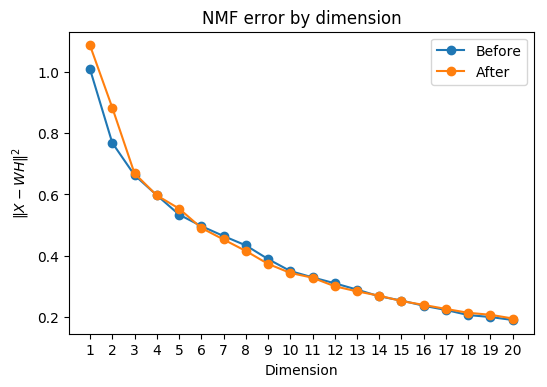

In [13]:
# plot NMF error by dimension
fig = plt.figure()
plt.plot(cnum_list, error_list1, 'o-', label='Before')
plt.plot(cnum_list, error_list2, 'o-', label='After')
plt.title("NMF error by dimension")
plt.xlabel("Dimension")
plt.ylabel("${\Vert X-WH \Vert}^{2} $")
plt.xticks(cnum_list, [str(cnum) for cnum in cnum_list])
plt.legend()
plt.show()
plt.close()

In [14]:
# NMF analysis
cID_basis1, id_weight1, error1 = analysis.NMF_analysis(id_psig1, cnum=4)
cID_basis2, id_weight2, error2 = analysis.NMF_analysis(id_psig2, cnum=4)

In [15]:
# set the name of basis
# before
cID_bname1 = ['hold', 'right-skew', 'partial-hold', 'left-skew']
#cID_bname1 = ["", "", ""]
# after
cID_bname2 = ['hold', 'symmetric', '1-step', 'noisy']

In [16]:
def get_mean_cutmaps (id_slider, id_weight, comp, fract=0.1):
    ids = analysis.dict_sort({id:id_weight[id][comp] for id in target_ids}, reverse=True)
    ids = ids[:int(fract*len(target_ids))]
    print len(ids)
    top_cutmaps, bott_cutmaps = [], []
    for id in ids:
        top_cutmap, bott_cutmap = id_slider[id].get_cutsig()
        top_cutmaps.append(top_cutmap)
        bott_cutmaps.append(bott_cutmap)
    return np.mean(top_cutmaps, axis=0), np.mean(bott_cutmaps, axis=0)

NMF basis (before)
basis 1
hold
2


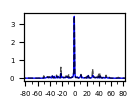

basis 2
right-skew
2


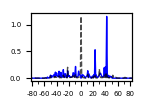

basis 3
partial-hold
2


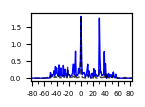

basis 4
left-skew
2


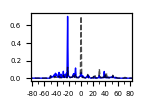

In [17]:
# plot NMF basis (before)
print "NMF basis (before)"
for cID in range(len(cID_basis1)):
    print "basis", cID+1
    print cID_bname1[cID]
    basis = cID_basis1[cID]
    mean_top_cutmap, mean_bott_cutmap = get_mean_cutmaps(mismatch_sliders1, id_weight1, cID, fract=0.01)
    fig = plt.figure(figsize=(1.3, 0.9))
    p1 = plt.plot(basis, 'b', label='Dyad', lw=1)
    ax = plt.gca()
    
    plt.xticks([i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)])
    
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
    plt.xlim([30, tlen-30])
    
    ax2 = ax.twinx()
    ax2.plot(WT_slider1.get_psig(), 'k--', alpha=0.7, lw=1)
    
    #p2 = ax2.plot(2*mean_top_cutmap, 'tab:green', alpha=0.7, label='Top')
    #p3 = ax2.plot(2*mean_bott_cutmap, 'tab:orange', alpha=0.7, label='Bottom')
    
    #p = p1 + p2 + p3
    #labs = [l.get_label() for l in p]
    #leg = ax.legend(p, labs, loc='upper right', fontsize=16)
    #for lh in leg.legendHandles: 
    #    lh.set_alpha(1)
    #    lh.set_linewidth(3.0)
        
    ax2.tick_params(right=False)
    ax2.set_yticks([])
    
    plt.savefig('b_' + str(cID) + '.svg', format='svg')
    plt.show()
    plt.close

NMF basis (after)
basis 1
hold
2


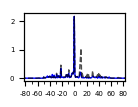

basis 2
symmetric
2


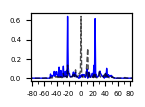

basis 3
1-step
2


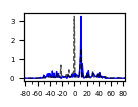

basis 4
noisy
2


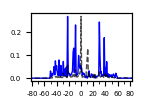

In [18]:
# plot NMF basis (after)
print "NMF basis (after)"
for cID in range(len(cID_basis2)):
    print "basis", cID+1
    print cID_bname2[cID]
    basis = cID_basis2[cID]
    mean_top_cutmap, mean_bott_cutmap = get_mean_cutmaps(mismatch_sliders2, id_weight2, cID, fract=0.01)
    fig = plt.figure(figsize=(1.3, 0.9))
    p1 = plt.plot(basis, 'b', label='Dyad', lw=1)
    ax = plt.gca()
    
    plt.xticks([i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)])
    
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
    plt.xlim([30, tlen-30])
    
    ax2 = ax.twinx()
    ax2.plot(WT_slider2.get_psig(), 'k--', alpha=0.7, lw=1)
    
    #p2 = ax2.plot(2*mean_top_cutmap, 'tab:green', alpha=0.7, label='Top')
    #p3 = ax2.plot(2*mean_bott_cutmap, 'tab:orange', alpha=0.7, label='Bottom')
    
    #p = p1 + p2 + p3
    #labs = [l.get_label() for l in p]
    #leg = ax.legend(p, labs, loc='upper right', fontsize=16)
    #for lh in leg.legendHandles: 
    #    lh.set_alpha(1)
    #    lh.set_linewidth(3.0)
        
    ax2.tick_params(right=False)
    ax2.set_yticks([])
    
    plt.savefig('a_' + str(cID) + '.svg', format='svg')
    plt.show()
    plt.close

In [19]:
# aggregate NMF-weight according to size and location of perturbations
def aggregate_weight (id_weight):
    size_loc_weights = {}
    for id in id_weight.keys():
        loc, mtype, nts = id.split('-')
        size = len(nts)
        if size not in size_loc_weights:
            size_loc_weights[size] = {}
        st = int(loc)
        ed = st+len(nts)
        for i in range(st, ed):
            if i not in size_loc_weights[size]:
                size_loc_weights[size][i] = []
            size_loc_weights[size][i].append(id_weight[id])

    size_loc_meanweight = {}
    for size in size_loc_weights:
        if size not in size_loc_meanweight:
            size_loc_meanweight[size] = {}
        for loc in size_loc_weights[size]:
            meanweight = np.mean(np.asarray(size_loc_weights[size][loc]), axis=0)
            size_loc_meanweight[size][loc] = meanweight

    return size_loc_meanweight

In [20]:
size_loc_meanweight1 = aggregate_weight (id_weight1)
size_loc_meanweight2 = aggregate_weight (id_weight2)

In [21]:
# change template to SHL coordinate
def change_to_shl (size_loc_value):
    size_shl_value = {}
    for size in size_loc_value:
        for loc in size_loc_value[size]:
            shl = loc - tlen/2
            value = size_loc_value[size][loc]
            if size not in size_shl_value:
                size_shl_value[size] = {}
            size_shl_value[size][shl] = value
    return size_shl_value

In [22]:
size_shl_meanweight1 = change_to_shl(size_loc_meanweight1)
size_shl_meanweight2 = change_to_shl(size_loc_meanweight2)

In [23]:
# save the result (before)
fname = path+'Park97mmlib_NMF_size_shl_meanweight1'+'.pickle'
pickle.dump(size_shl_meanweight1, open(fname, 'wb'))
# save the result (after)
fname = path+'Park97mmlib_NMF_size_shl_meanweight2'+'.pickle'
pickle.dump(size_shl_meanweight2, open(fname, 'wb'))

In [24]:
# plot aggreated weight map
def plot_aggweight_map (size_loc_meanweight, component, cmap='jet', msize=None, figsize=None, fontsize=None, note=''):
    X_list, Y_list, C_list = [], [], []
    for size in size_loc_meanweight:
        for loc in size_loc_meanweight[size]:
            X_list.append(loc+1)
            Y_list.append(size)
            C_list.append(size_loc_meanweight[size][loc][component])
            
    if figsize == None:
        figsize = (20,3)
    if fontsize == None:
        fontsize = 14
    
    fig = plt.figure(figsize=figsize)
    plt.scatter(X_list, Y_list, c=C_list, s=msize, cmap = cmap, vmin=min(C_list), vmax=max(C_list))
    
    sizemin, sizemax = min(size_loc_meanweight.keys()), max(size_loc_meanweight.keys())
    plt.yticks(range(sizemin, sizemax+1, 2), [str(u)for u in range(sizemin, sizemax+1, 2)], fontsize=fontsize)
    plt.ylim([sizemin-0.5, sizemax+0.5])
    
    xticklabels = []
    label_count = 0
    TAs = []
    for pos in range(40, tlen-40):
        new_pos = pos - tlen/2
        if abs(new_pos) < 40 and (WTseq[pos:pos+2] == 'TA' or WTseq[pos-1:pos+1] == 'TA'):
            TAs.append(label_count)
        s = WTseq[pos]
        if abs(new_pos) % 10 == 0:
            s+= '\n'
            if new_pos > 0:
                s+= '+' + str(new_pos)
            else:
                s+= str(new_pos)
        xticklabels.append(s)
        label_count+=1
        
    plt.xticks(range(40, tlen-40), xticklabels, fontsize=fontsize-0.5)
    
    ax = plt.gca()
    for u in TAs:
        tl = ax.get_xticklabels()[u]
        tl.set_fontweight('bold')

    #plt.xlim([40-0.5, tlen-41+0.5])
    plt.xlim([45-0.5, tlen-45+0.5])
    
    #cbar = plt.colorbar(pad=0.01)
    cbar = plt.colorbar(pad=0.01, ticks=[min(C_list), max(C_list)], aspect=8)
    cbar.ax.set_yticklabels([str(round(min(C_list), 2)), str(round(max(C_list), 2))], fontsize=fontsize)
    #cbar.ax.set_ylabel('Weight', rotation=-90, va="bottom", labelpad=5, fontsize=14)
    #plt.title("NMF map")
    #plt.xlabel("Poly-A tract locations on 601 DNA")
    #plt.ylabel('Size (bp)', fontsize=fontsize)
    plt.tight_layout()
    plt.savefig('NMF_' + note + '.svg', format='svg', bbox_inches='tight')
    plt.show()
    plt.close()

hold


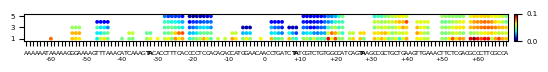

right-skew


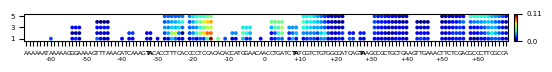

partial-hold


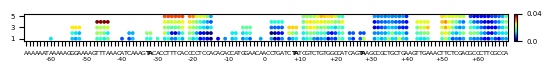

left-skew


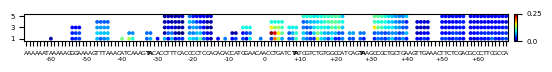

In [25]:
# before sliding
for i in range(len(cID_bname1)):
    #print "basis %d" % (i+1)
    print cID_bname1[i]
    plot_aggweight_map (size_loc_meanweight1, i, note=str(i), cmap='jet', figsize=(6.2, 0.82), msize=3, fontsize=5)

hold


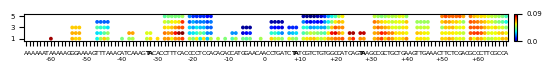

symmetric


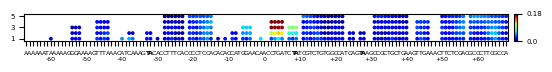

1-step


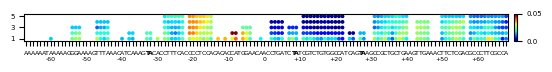

noisy


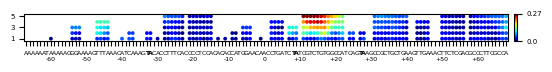

In [26]:
# after sliding
for i in range(len(cID_bname2)):
    #print "basis %d" % (i+1)
    print cID_bname2[i]
    plot_aggweight_map (size_loc_meanweight2, i, note=str(i), figsize=(6.2, 0.82), msize=3, fontsize=5)

In [27]:
def convert_shl_coordinate (size_loc_meanweight, dyads):
    dyad_size_shl_meanweight = {}
    for size in size_loc_meanweight:
        for loc in size_loc_meanweight[size]:
            meanweight = size_loc_meanweight[size][loc]
            for dyad in dyads:
                shl = loc - dyad
                if abs(shl) > 80:
                    continue
                if dyad not in dyad_size_shl_meanweight:
                    dyad_size_shl_meanweight[dyad] = {}
                if size not in dyad_size_shl_meanweight[dyad]:
                    dyad_size_shl_meanweight[dyad][size] = {k:np.nan for k in range(-80, 81)}
                dyad_size_shl_meanweight[dyad][size][shl] = meanweight
    return dyad_size_shl_meanweight

In [28]:
dyad_size_shl_meanweight1 = convert_shl_coordinate(size_loc_meanweight1, dyads=[tlen/2, tlen/2-11, tlen/2-20, tlen/2+20])
dyad_size_shl_meanweight2 = convert_shl_coordinate(size_loc_meanweight2, dyads=[tlen/2, tlen/2-11, tlen/2-20, tlen/2+20])

In [29]:
def plot_NMF_around_shl (dyad_size_shl_meanweight, 
                         dyad, 
                         component, 
                         figsize, 
                         xlims=[None, None], 
                         ylims=[None, None], 
                         cmap='jet', 
                         note=''):
    
    size_shl_meanweight = dyad_size_shl_meanweight[dyad]
    
    color_list = np.linspace(0.3, 1, num=len(size_shl_meanweight))
    cmap = cm.get_cmap(cmap)
    
    fullX = range(-80, 81)
    
    fig = plt.figure(figsize=figsize)
    for i in range(len(size_shl_meanweight)):
        size = sorted(size_shl_meanweight.keys())[i]
        shl_meanweight = size_shl_meanweight[size]
        
        X, Y = [], []
        for j in range(len(shl_meanweight)):
            shl = sorted(shl_meanweight.keys())[j]
            meanweight = shl_meanweight[shl]
            try:
                Y.append(meanweight[component])
                X.append(fullX[j])
            except:
                continue
        
        #p = plt.plot(X, Y, '.', color=cmap(color_list[i]), markersize=4, label=size)
        p = plt.plot(X, Y, '.', markersize=4, label=str(size) + ' bp')
        plt.plot(X, Y, '-', alpha=0.5, color=p[0].get_color())
        
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.gca().tick_params(axis='both', which='major', labelsize=5)
    plt.gca().tick_params(axis='both', which='minor', labelsize=5)
    plt.gca().yaxis.tick_right()
    #leg = plt.legend(frameon=False, loc='upper right', labelspacing=0.001, fontsize=5)
    
    plt.savefig('NMF_shl_' + note + '.svg', format='svg', bbox_inches='tight')
    plt.show()
    plt.close()

In [30]:
cID_dyad = [tlen/2-20, tlen/2+20, tlen/2, tlen/2-11]
cID_shl = [20, -20, -20, -20]

hold


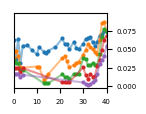

symmetric


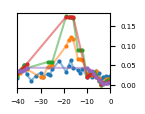

1-step


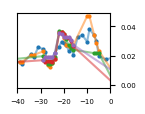

noisy


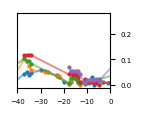

In [31]:
for cID in range(len(cID_bname2)):
    dyad, shl = cID_dyad[cID], cID_shl[cID]
    if dyad == None:
        continue
    print cID_bname2[cID]
    plot_NMF_around_shl (dyad_size_shl_meanweight2, 
                         dyad=dyad, 
                         component=cID, 
                         figsize=(1.2,1), 
                         xlims=[shl-20, shl+20], 
                         cmap=None,
                         note=cID_bname2[cID])